<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import collections
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifier:
    def __init__(self, verbose=False):
        self.verbose = verbose

    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels == label] / np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = (len(labels_l) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_l)
        gain_r = (len(labels_r) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_r)
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain

    def fit(self, X, y):
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:, feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X, feature_index, y, threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:, feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:, feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature', self.feature, 'threshold', self.threshold, 'gain', self.gain)

    def predict(self, X):
        predictions = np.where(X[:, self.feature] < self.threshold, self.l_label, self.r_label)
        return np.array(predictions)

# [Problem 1] Function for finding impureness

In [2]:
#Test the function with the datase
X = np.array([[1, 2],
              [2, 1],
              [3, 2],
              [1, 3],
              [2, 3],
              [3, 1]])

y = np.array([0, 0, 1, 1, 1, 0])

In [3]:
dt = ScratchDecisionTreeClassifier()
gini = dt._calc_gini(y)
print(f"Gini impurity for the entire dataset: {float(gini.item()):.4f}")

Gini impurity for the entire dataset: 0.5000


# [Problem 2] Function for finding information gain

In [4]:
feature_index = 0
threshold = 2
ig = dt._calc_ig(X, feature_index, y, threshold)
print(f'Information gain for the feature:{float(gini.item()):.3f}')

Information gain for the feature:0.500


# [Problem 3] Learning

In [5]:
#generating a graph
# Create an instance of the decision tree classifier
x1 = np.array([[1,2], [1,4], [2,5], [3,2]])
y1 = np.array([0, 0, 1, 1])
dt = ScratchDecisionTreeClassifier(verbose=True)

# Fit the model to the data
dt.fit(X, y)

feature 0 threshold 2 gain [5.55111512e-17]
feature 1 threshold 2 gain [0.25]


# [Problem 4] Estimate

In [6]:
# Test data
X_test = np.array([[1, 1],
                   [2, 2],
                   [3, 3], [4,5]])

# Predict labels for the test data
y_pred = dt.predict(X_test)
print("Predicted labels:", y_pred)

Predicted labels: [0 1 1 1]


# [Problem 5] Learning and estimation

In [7]:
#using binary classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#load the iris datasets
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt1 = ScratchDecisionTreeClassifier()
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)

In [9]:
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0]


In [10]:
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [11]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)
y_pred2

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [12]:
print('Classification Report:\n', classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



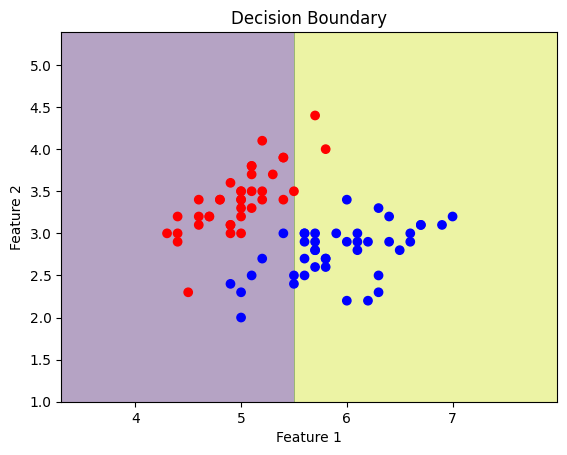

In [13]:
from matplotlib.colors import ListedColormap
def decision_region(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Example usage:
dt = ScratchDecisionTreeClassifier(verbose=False)
dt.fit(X_train, y_train)
decision_region(X_train, y_train, dt)


# [Problem 7] (Advance assignment) Creation of a decision tree classifier class with a depth of 2


In [17]:
class ScratchDecisionTreeClassifierDepth2:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.left_label = None
        self.right_label = None

    def _calc_gini(self, y):
        # Calculate Gini impurity (similar to your previous implementation)
        # ...
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels == label] / np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self, X, feature_index, y, threshold):
        # Calculate information gain (similar to your previous implementation)
        # ...
       labels_l = y[X[:, feature_index] < threshold]
       labels_r = y[X[:, feature_index] >= threshold]
       gain_l = (len(labels_l) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_l)
       gain_r = (len(labels_r) / (len(labels_l) + len(labels_r))) * self._calc_gini(labels_r)
       gain = self._calc_gini(y) - gain_l - gain_r
       return gain

    def fit(self, X, y):
        best_gain = 0
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._calc_ig(X, feature_index, y, threshold)
                if gain > best_gain:
                    self.feature = feature_index
                    self.threshold = threshold
                    best_gain = gain

        # Split the data based on the best feature and threshold
        left_indices = X[:, self.feature] < self.threshold
        right_indices = ~left_indices
        self.left_label = collections.Counter(y[left_indices]).most_common()[0][0]
        self.right_label = collections.Counter(y[right_indices]).most_common()[0][0]

    def predict(self, X):
        predictions = np.where(X[:, self.feature] < self.threshold, self.left_label, self.right_label)
        return predictions

In [18]:
dt_depth2 = ScratchDecisionTreeClassifierDepth2()
dt_depth2.fit(X_train, y_train)
y_pred_depth2 = dt_depth2.predict(X_test)
print("Predicted labels (depth 2):", y_pred_depth2)

Predicted labels (depth 2): [1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0]
